In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Harshita uppalpati\Downloads\emotion.csv")
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [3]:
df.shape

(16000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [5]:
df.label.value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

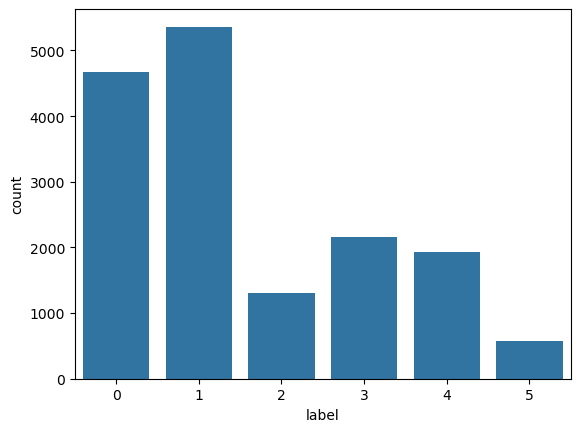

In [6]:
import seaborn as sns
sns.countplot(x=df.label)

In [7]:
df.isna().sum()

text     0
label    0
dtype: int64

In [8]:
df['text']=df['text'].apply(lambda x:"".join(x.lower() for x in x.split()))

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Harshita
[nltk_data]     uppalpati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
df['text']=df['text'].apply(lambda x:"".join(x for x in x.split() if x not in stop))

In [11]:
from nltk.stem import WordNetLemmatizer
from textblob import Word
df['text']=df['text'].apply(lambda x:"".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

0                                 ididntfeelhumiliated
1    icangofromfeelingsohopelesstosodamnedhopefulju...
2              imgrabbingaminutetopostifeelgreedywrong
3    iameverfeelingnostalgicaboutthefireplaceiwillk...
4                                    iamfeelinggrouchy
Name: text, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(df['text'])
x=x.toarray()
y=df.label.values

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2,shuffle=True)

In [14]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model=model.fit(x_train,y_train)
pred=model.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [16]:
print(confusion_matrix(y_test,pred))

[[   0    0    0    0    0  905]
 [   0    0    2    0    0 1051]
 [   0    3    0    0    0  268]
 [   0    0    0    0    0  459]
 [   0    0    0    1    0  396]
 [   0    0    0    0    0  115]]


In [17]:
print(accuracy_score(y_test,pred))

0.0359375


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier()
clf_rf.fit(x_train,y_train)
rf_pred=clf_rf.predict(x_test).astype(int)

In [ ]:
print(confusion_matrix(y_test,rf_pred))

In [ ]:
print(accuracy_score(y_test,rf_pred))

In [ ]:
print(classification_report(y_test,rf_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
lr_pred=logreg.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,lr_pred))

In [ ]:
print(classification_report(y_test,lr_pred))

In [ ]:
print(accuracy_score(y_test,lr_pred))